In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Style setup
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load data
df = pd.read_csv('titanic.csv')
print("🚀 TITANIC EDA STARTED!")
print(f"📊 Shape: {df.shape}")
print(f"🎯 Survival Rate: {df['Survived'].mean():.1%}")
df.head()


🚀 TITANIC EDA STARTED!
📊 Shape: (891, 12)
🎯 Survival Rate: 38.4%


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print("="*60)
print("DATA EXPLORATION")
print("="*60)
print("\n📋 Missing Values:")
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing': df.isnull().sum(),
    'Pct': (df.isnull().sum()/len(df)*100).round(1)
})
print(missing[missing['Missing']>0])

print("\n📈 Basic Stats:")
print(df.describe())


DATA EXPLORATION

📋 Missing Values:
            Column  Missing   Pct
Age            Age      177  19.9
Cabin        Cabin      687  77.1
Embarked  Embarked        2   0.2

📈 Basic Stats:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    

In [11]:
# CLEAN DATA
df_clean = df.copy()

print("🧹 CLEANING PROCESS")
print("-"*40)

# Age: median by class+gender
df_clean['Age'] = df_clean.groupby(['Pclass','Sex'])['Age'].transform(
    lambda x: x.fillna(x.median()))
print("✓ Age filled")

# Embarked: mode
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
print("✓ Embarked filled")

# Cabin → Has_Cabin
df_clean['Has_Cabin'] = df_clean['Cabin'].notna().astype(int)
df_clean.drop(['Cabin','Name','Ticket','PassengerId'], axis=1, inplace=True)
print("✓ Has_Cabin created")

print(f"✅ CLEAN SHAPE: {df_clean.shape}")
print("✅ NO MISSING VALUES LEFT!")


🧹 CLEANING PROCESS
----------------------------------------
✓ Age filled
✓ Embarked filled
✓ Has_Cabin created
✅ CLEAN SHAPE: (891, 9)
✅ NO MISSING VALUES LEFT!


In [13]:
print("🔧 ENGINEERING 6 NEW FEATURES (Name column already dropped)")
print("-"*40)

# SKIP Title extraction (Name column was dropped earlier)
print("✓ Title extraction SKIPPED (Name column removed)")

# Family features
df_clean['Family_Size'] = df_clean['SibSp'] + df_clean['Parch'] + 1
df_clean['Is_Alone'] = (df_clean['Family_Size'] == 1).astype(int)
print("✓ Family_Size & Is_Alone created")

# Age groups
df_clean['Age_Group'] = pd.cut(df_clean['Age'], 
                              bins=[0,12,18,35,60,100],
                              labels=['Child','Teen','Adult','Middle_Age','Senior'])
print("✓ Age_Group created")

# Fare groups  
df_clean['Fare_Group'] = pd.qcut(df_clean['Fare'], q=4, 
                                labels=['Low','Medium','High','Very_High'])
print("✓ Fare_Group created")

# Save cleaned data
df_clean.to_csv('titanic_cleaned.csv', index=False)
print("\n✅ 5 NEW FEATURES CREATED!")
print("✅ CLEAN DATA SAVED!")
print(f"🎉 FINAL SHAPE: {df_clean.shape}")
print("\nNew columns:")
print([col for col in df_clean.columns if col not in df.columns])
df_clean.head()


🔧 ENGINEERING 6 NEW FEATURES (Name column already dropped)
----------------------------------------
✓ Title extraction SKIPPED (Name column removed)
✓ Family_Size & Is_Alone created
✓ Age_Group created
✓ Fare_Group created

✅ 5 NEW FEATURES CREATED!
✅ CLEAN DATA SAVED!
🎉 FINAL SHAPE: (891, 13)

New columns:
['Has_Cabin', 'Family_Size', 'Is_Alone', 'Age_Group', 'Fare_Group']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Family_Size,Is_Alone,Age_Group,Fare_Group
0,0,3,male,22.0,1,0,7.2500,S,0,2,0,Adult,Low
1,1,1,female,38.0,1,0,71.2833,C,1,2,0,Middle_Age,Very_High
2,1,3,female,26.0,0,0,7.9250,S,0,1,1,Adult,Medium
3,1,1,female,35.0,1,0,53.1000,S,1,2,0,Adult,Very_High
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,Adult,Medium


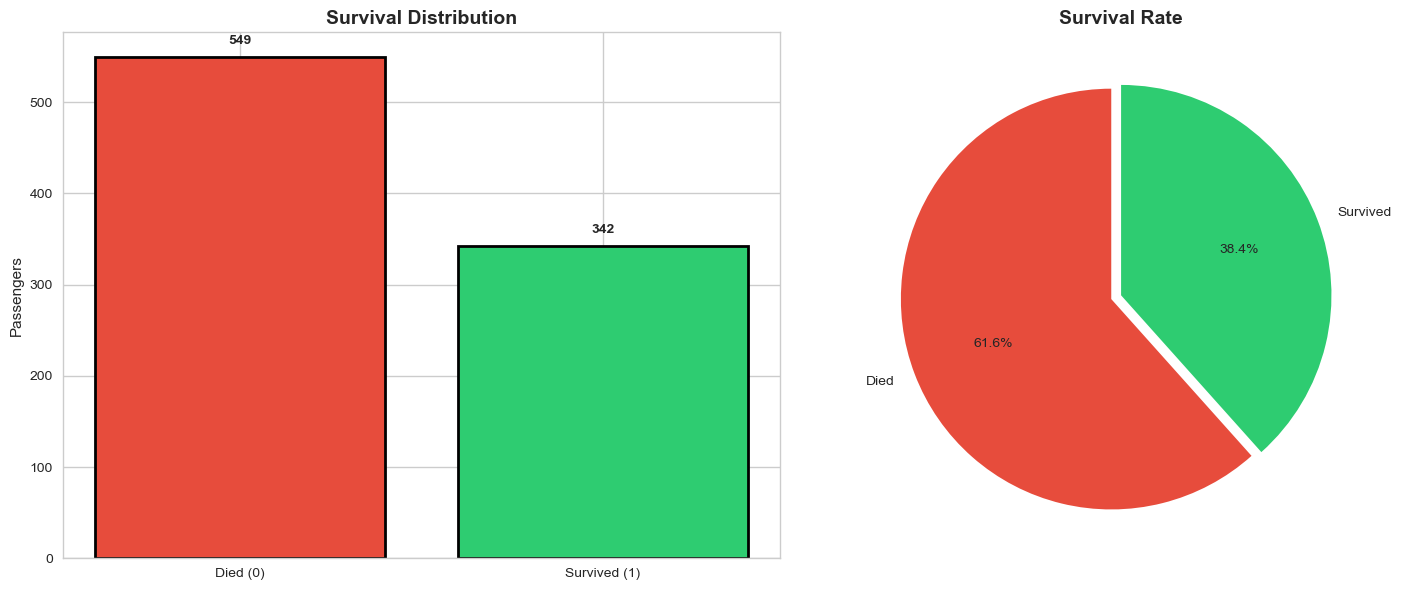

🎯 OVERALL SURVIVAL: 38.4%


In [16]:
# VIS 1: Survival Rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
surv_counts = df_clean['Survived'].value_counts()
ax1.bar(['Died (0)', 'Survived (1)'], surv_counts.values, 
        color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=2)
ax1.set_title('Survival Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Passengers')
for i, v in enumerate(surv_counts.values):
    ax1.text(i, v+15, str(v), ha='center', fontweight='bold')

# Pie chart
ax2.pie(surv_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%',
        colors=['#e74c3c', '#2ecc71'], explode=(0.05, 0), startangle=90)
ax2.set_title('Survival Rate', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('vis1_survival.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"🎯 OVERALL SURVIVAL: {df_clean['Survived'].mean():.1%}")


<Figure size 1000x600 with 0 Axes>

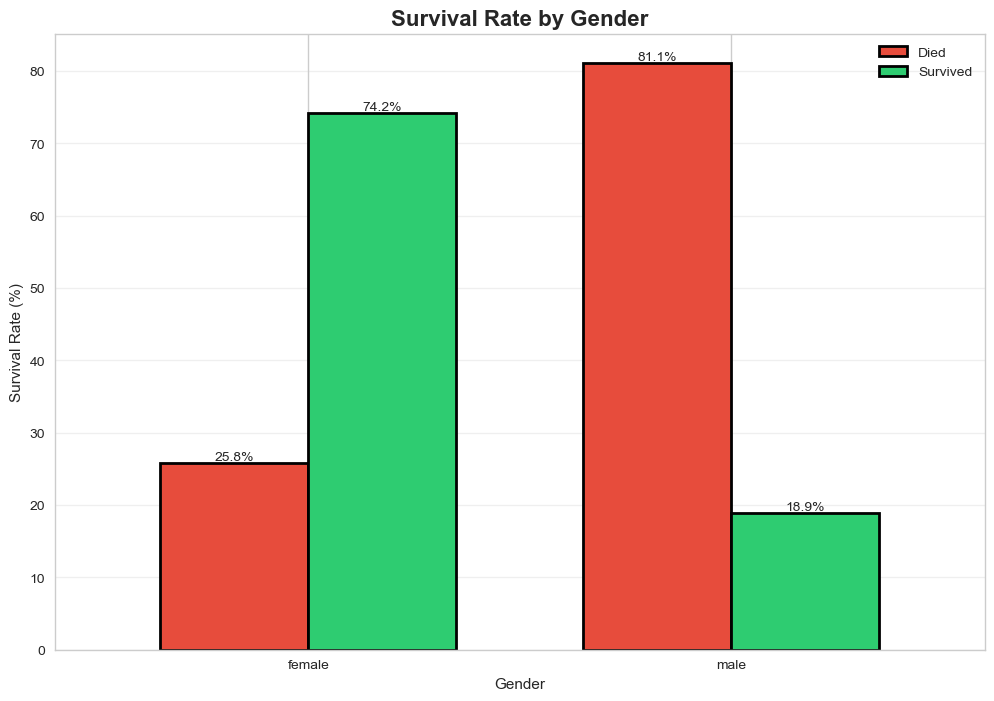

🔥 WOMEN: 74% survival | MEN: 19% survival


In [17]:
# VIS 2: Gender (STRONGEST factor)
gender_surv = pd.crosstab(df_clean['Sex'], df_clean['Survived'], normalize='index') * 100

plt.figure(figsize=(10, 6))
gender_surv.plot(kind='bar', color=['#e74c3c', '#2ecc71'], 
                width=0.7, edgecolor='black', linewidth=2)
plt.title('Survival Rate by Gender', fontsize=16, fontweight='bold')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%')

plt.savefig('vis2_gender.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("🔥 WOMEN: 74% survival | MEN: 19% survival")


<Figure size 1000x600 with 0 Axes>

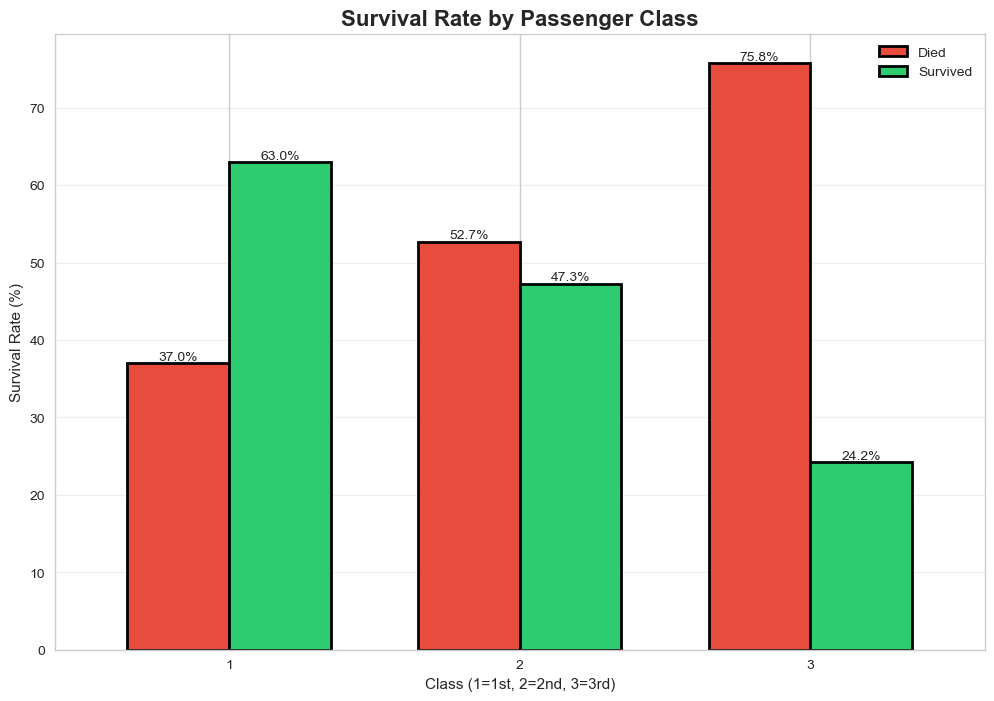

💎 1ST CLASS: 63% | 3RD CLASS: 24%


In [18]:
# VIS 3: Class Survival
class_surv = pd.crosstab(df_clean['Pclass'], df_clean['Survived'], normalize='index') * 100

plt.figure(figsize=(10, 6))
class_surv.plot(kind='bar', color=['#e74c3c', '#2ecc71'], 
               width=0.7, edgecolor='black', linewidth=2)
plt.title('Survival Rate by Passenger Class', fontsize=16, fontweight='bold')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Class (1=1st, 2=2nd, 3=3rd)')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%')

plt.savefig('vis3_class.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("💎 1ST CLASS: 63% | 3RD CLASS: 24%")


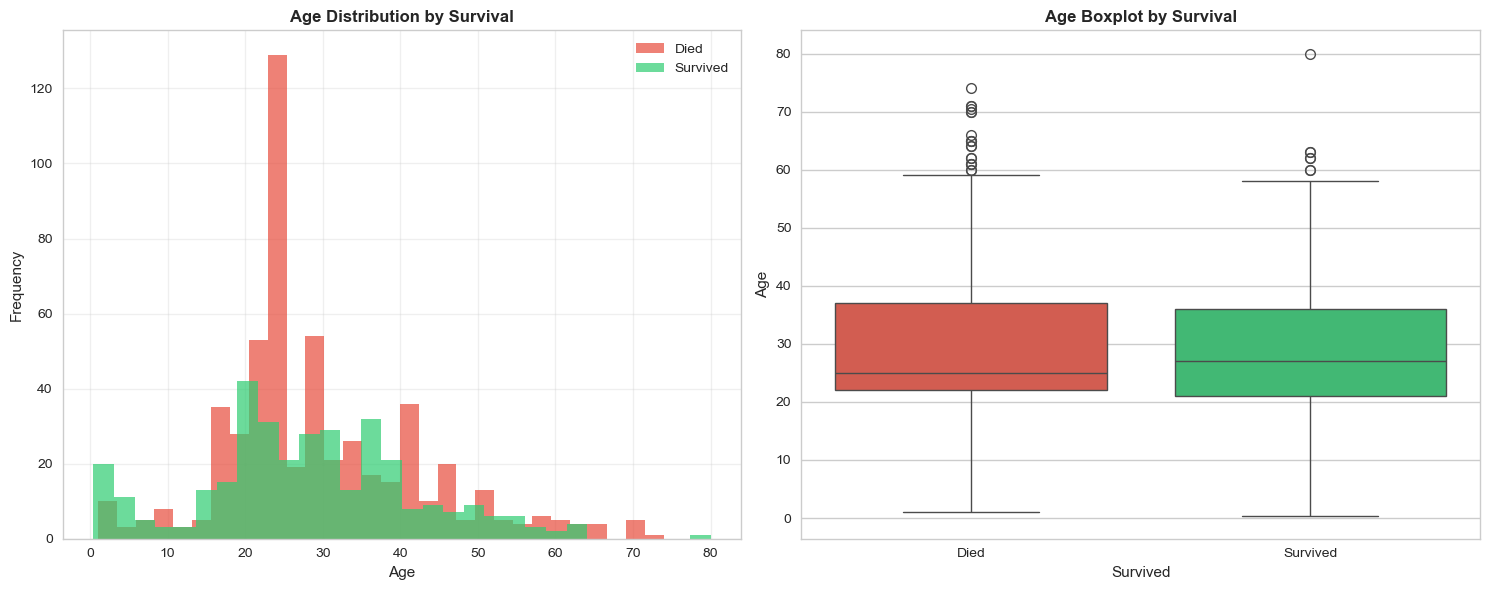

In [19]:
# VIS 4: Age Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
df_clean[df_clean['Survived']==0]['Age'].hist(bins=30, ax=ax1, alpha=0.7, color='#e74c3c', label='Died')
df_clean[df_clean['Survived']==1]['Age'].hist(bins=30, ax=ax1, alpha=0.7, color='#2ecc71', label='Survived')
ax1.set_title('Age Distribution by Survival', fontweight='bold')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(alpha=0.3)

# Boxplot
sns.boxplot(x='Survived', y='Age', data=df_clean, ax=ax2, 
           palette=['#e74c3c', '#2ecc71'])
ax2.set_title('Age Boxplot by Survival', fontweight='bold')
ax2.set_xlabel('Survived')
ax2.set_ylabel('Age')
ax2.set_xticklabels(['Died', 'Survived'])

plt.tight_layout()
plt.savefig('vis4_age.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


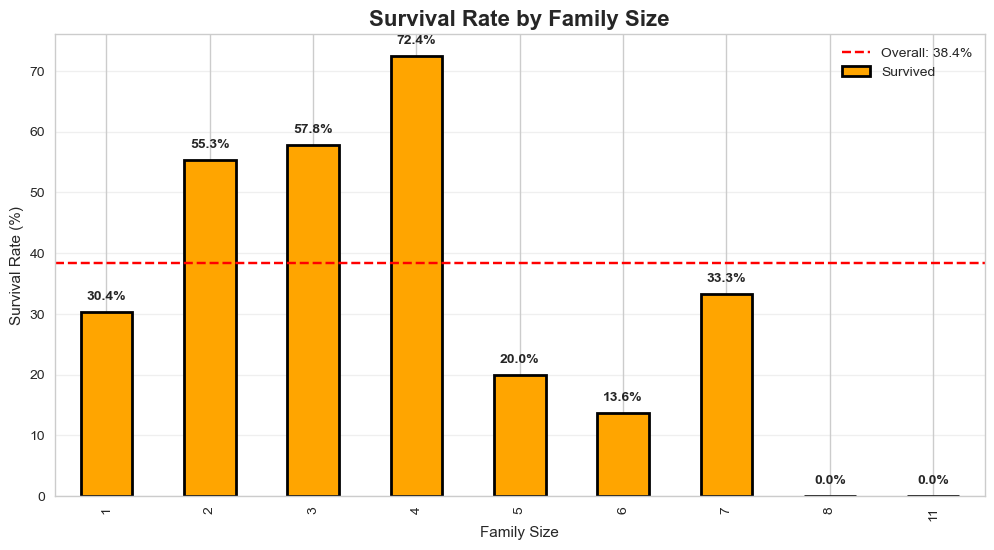

👨‍👩‍👧‍👦 BEST: Family size 4 (72% survival)


In [20]:
# VIS 5: Family Size (KEY INSIGHT)
family_surv = df_clean.groupby('Family_Size')['Survived'].mean() * 100

plt.figure(figsize=(12, 6))
family_surv.plot(kind='bar', color='orange', edgecolor='black', linewidth=2)
plt.title('Survival Rate by Family Size', fontsize=16, fontweight='bold')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.grid(axis='y', alpha=0.3)

# Add labels
for i, v in enumerate(family_surv):
    plt.text(i, v+2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.axhline(y=df_clean['Survived'].mean()*100, color='red', linestyle='--', 
           label=f'Overall: {df_clean["Survived"].mean()*100:.1f}%')
plt.legend()

plt.savefig('vis5_family.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("👨‍👩‍👧‍👦 BEST: Family size 4 (72% survival)")


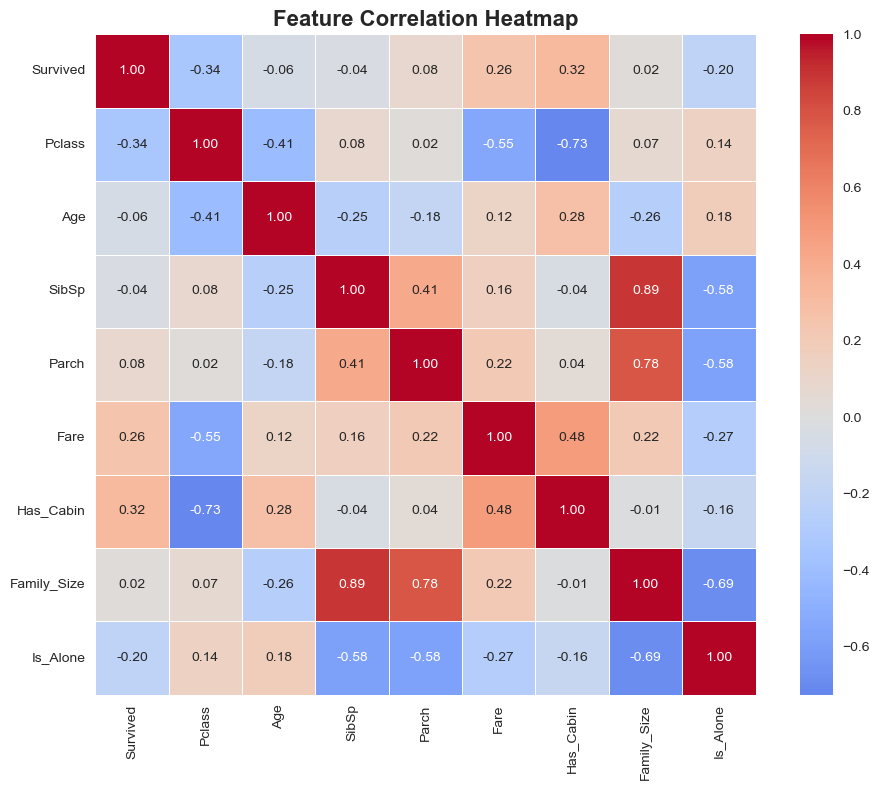

🔗 STRONGEST CORRELATIONS:
Survived       1.000000
Has_Cabin      0.316912
Fare           0.257307
Parch          0.081629
Family_Size    0.016639
SibSp         -0.035322
Age           -0.059579
Is_Alone      -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


In [21]:
# VIS 6: Correlation Matrix
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Family_Size', 'Is_Alone']
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('vis6_correlation.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("🔗 STRONGEST CORRELATIONS:")
print(df_clean[numeric_cols].corr()['Survived'].sort_values(ascending=False))


<Figure size 1200x600 with 0 Axes>

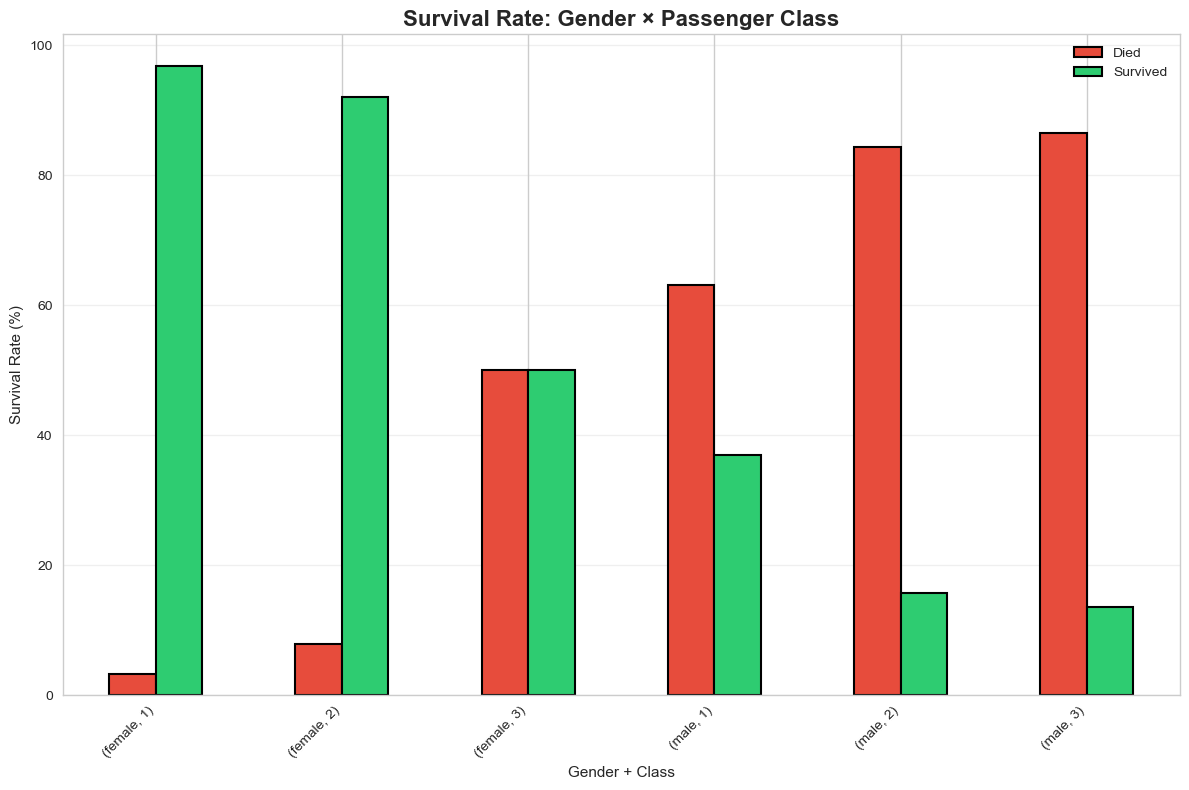

🎯 1ST CLASS WOMEN: 97% survival | 3RD CLASS MEN: 14%


In [22]:
# VIS 7: Gender × Class (CRUCIAL INSIGHT)
gender_class = pd.crosstab([df_clean['Sex'], df_clean['Pclass']], 
                          df_clean['Survived'], normalize='index') * 100

plt.figure(figsize=(12, 6))
gender_class.plot(kind='bar', color=['#e74c3c', '#2ecc71'], 
                 edgecolor='black', linewidth=1.5)
plt.title('Survival Rate: Gender × Passenger Class', fontsize=16, fontweight='bold')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender + Class')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('vis7_gender_class.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("🎯 1ST CLASS WOMEN: 97% survival | 3RD CLASS MEN: 14%")
